In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
patterns = [
    ('output-opt-1.3b-opt-2.7b-0.5-{i}-200', 'OPT-2.7B'),
    # ('quarter/output-opt-1.3b-opt-2.7b-0.25-{i}-200', 'OPT-2.7B-1/4'),
    ('output-Mistral-7B-v0.1-Llama-2-7b-hf-0.5-{i}-300', 'Llama-2-7b'),
    ('output-Llama-2-7b-hf-Mistral-7B-v0.1-0.5-{i}-300', 'Mistral-7B')
]

In [11]:
data = []

In [12]:
# 遍历每个文件夹模式
for pattern, source in patterns:
    # 遍历每个子文件夹
    for i in range(11):
        folder_name = pattern.format(i=i)
        file_path = os.path.join(folder_name, 'gen_table_w_metrics.jsonl')
        
        if os.path.exists(file_path):
            with open(file_path, 'r') as file:
                for line in file:
                    record = json.loads(line)
                    if 'w_bl_ppl' in record and not pd.isna(record['w_bl_ppl']):
                        data.append({
                            'model': source,
                            'i': i,
                            'w_bl_ppl': record['w_bl_ppl'],
                            'no_bl_ppl': record['no_bl_ppl'],
                            'no_bl_gen_time': record['no_bl_gen_time'],
                            'w_bl_gen_time': record['w_bl_gen_time']
                        })


In [13]:
# 将数据转换为DataFrame
df = pd.DataFrame(data)

In [14]:
df = df.dropna(subset=['w_bl_ppl'])
df = df[~((df['w_bl_gen_time'] > 100) & (df['model'] == 'OPT-2.7B'))]
df

,model,i,w_bl_ppl,no_bl_ppl,no_bl_gen_time,w_bl_gen_time
0,OPT-2.7B,0,1.439376,1.439376,26.678228,26.623414
1,OPT-2.7B,0,3.267914,3.267914,3.777744,3.800457
2,OPT-2.7B,0,1.191975,1.191975,29.519856,29.852506
3,OPT-2.7B,0,1.592527,1.592527,26.094816,26.245891
4,OPT-2.7B,0,1.653367,1.653367,25.850731,25.904077
...,...,...,...,...,...,...
645,Mistral-7B,10,9.731156,2.730819,134.809662,50.554412
646,Mistral-7B,10,9.299810,2.712922,131.143605,131.834593
647,Mistral-7B,10,22.613012,2.494993,136.533258,24.091347
648,Mistral-7B,10,9.767824,1.916002,145.212172,146.057932


In [7]:
df[df['i'] == 6]

,model,i,w_bl_ppl,no_bl_ppl,no_bl_gen_time,w_bl_gen_time
120,OPT-2.7B,6,1.597339,1.439376,26.493541,26.797706
121,OPT-2.7B,6,2.776839,3.267914,3.790901,26.331802
122,OPT-2.7B,6,1.170500,1.191975,29.323120,29.525086
123,OPT-2.7B,6,2.290643,1.592527,26.055013,26.191902
124,OPT-2.7B,6,3.470042,1.653367,25.751582,25.988169
125,OPT-2.7B,6,2.559826,1.681962,24.875974,25.104123
126,OPT-2.7B,6,2.682045,2.150860,25.125088,25.291350
127,OPT-2.7B,6,1.194602,1.281175,24.589790,24.733981
128,OPT-2.7B,6,1.944656,1.498554,43.840815,37.593480
129,OPT-2.7B,6,4.119964,1.674248,28.296458,28.413809


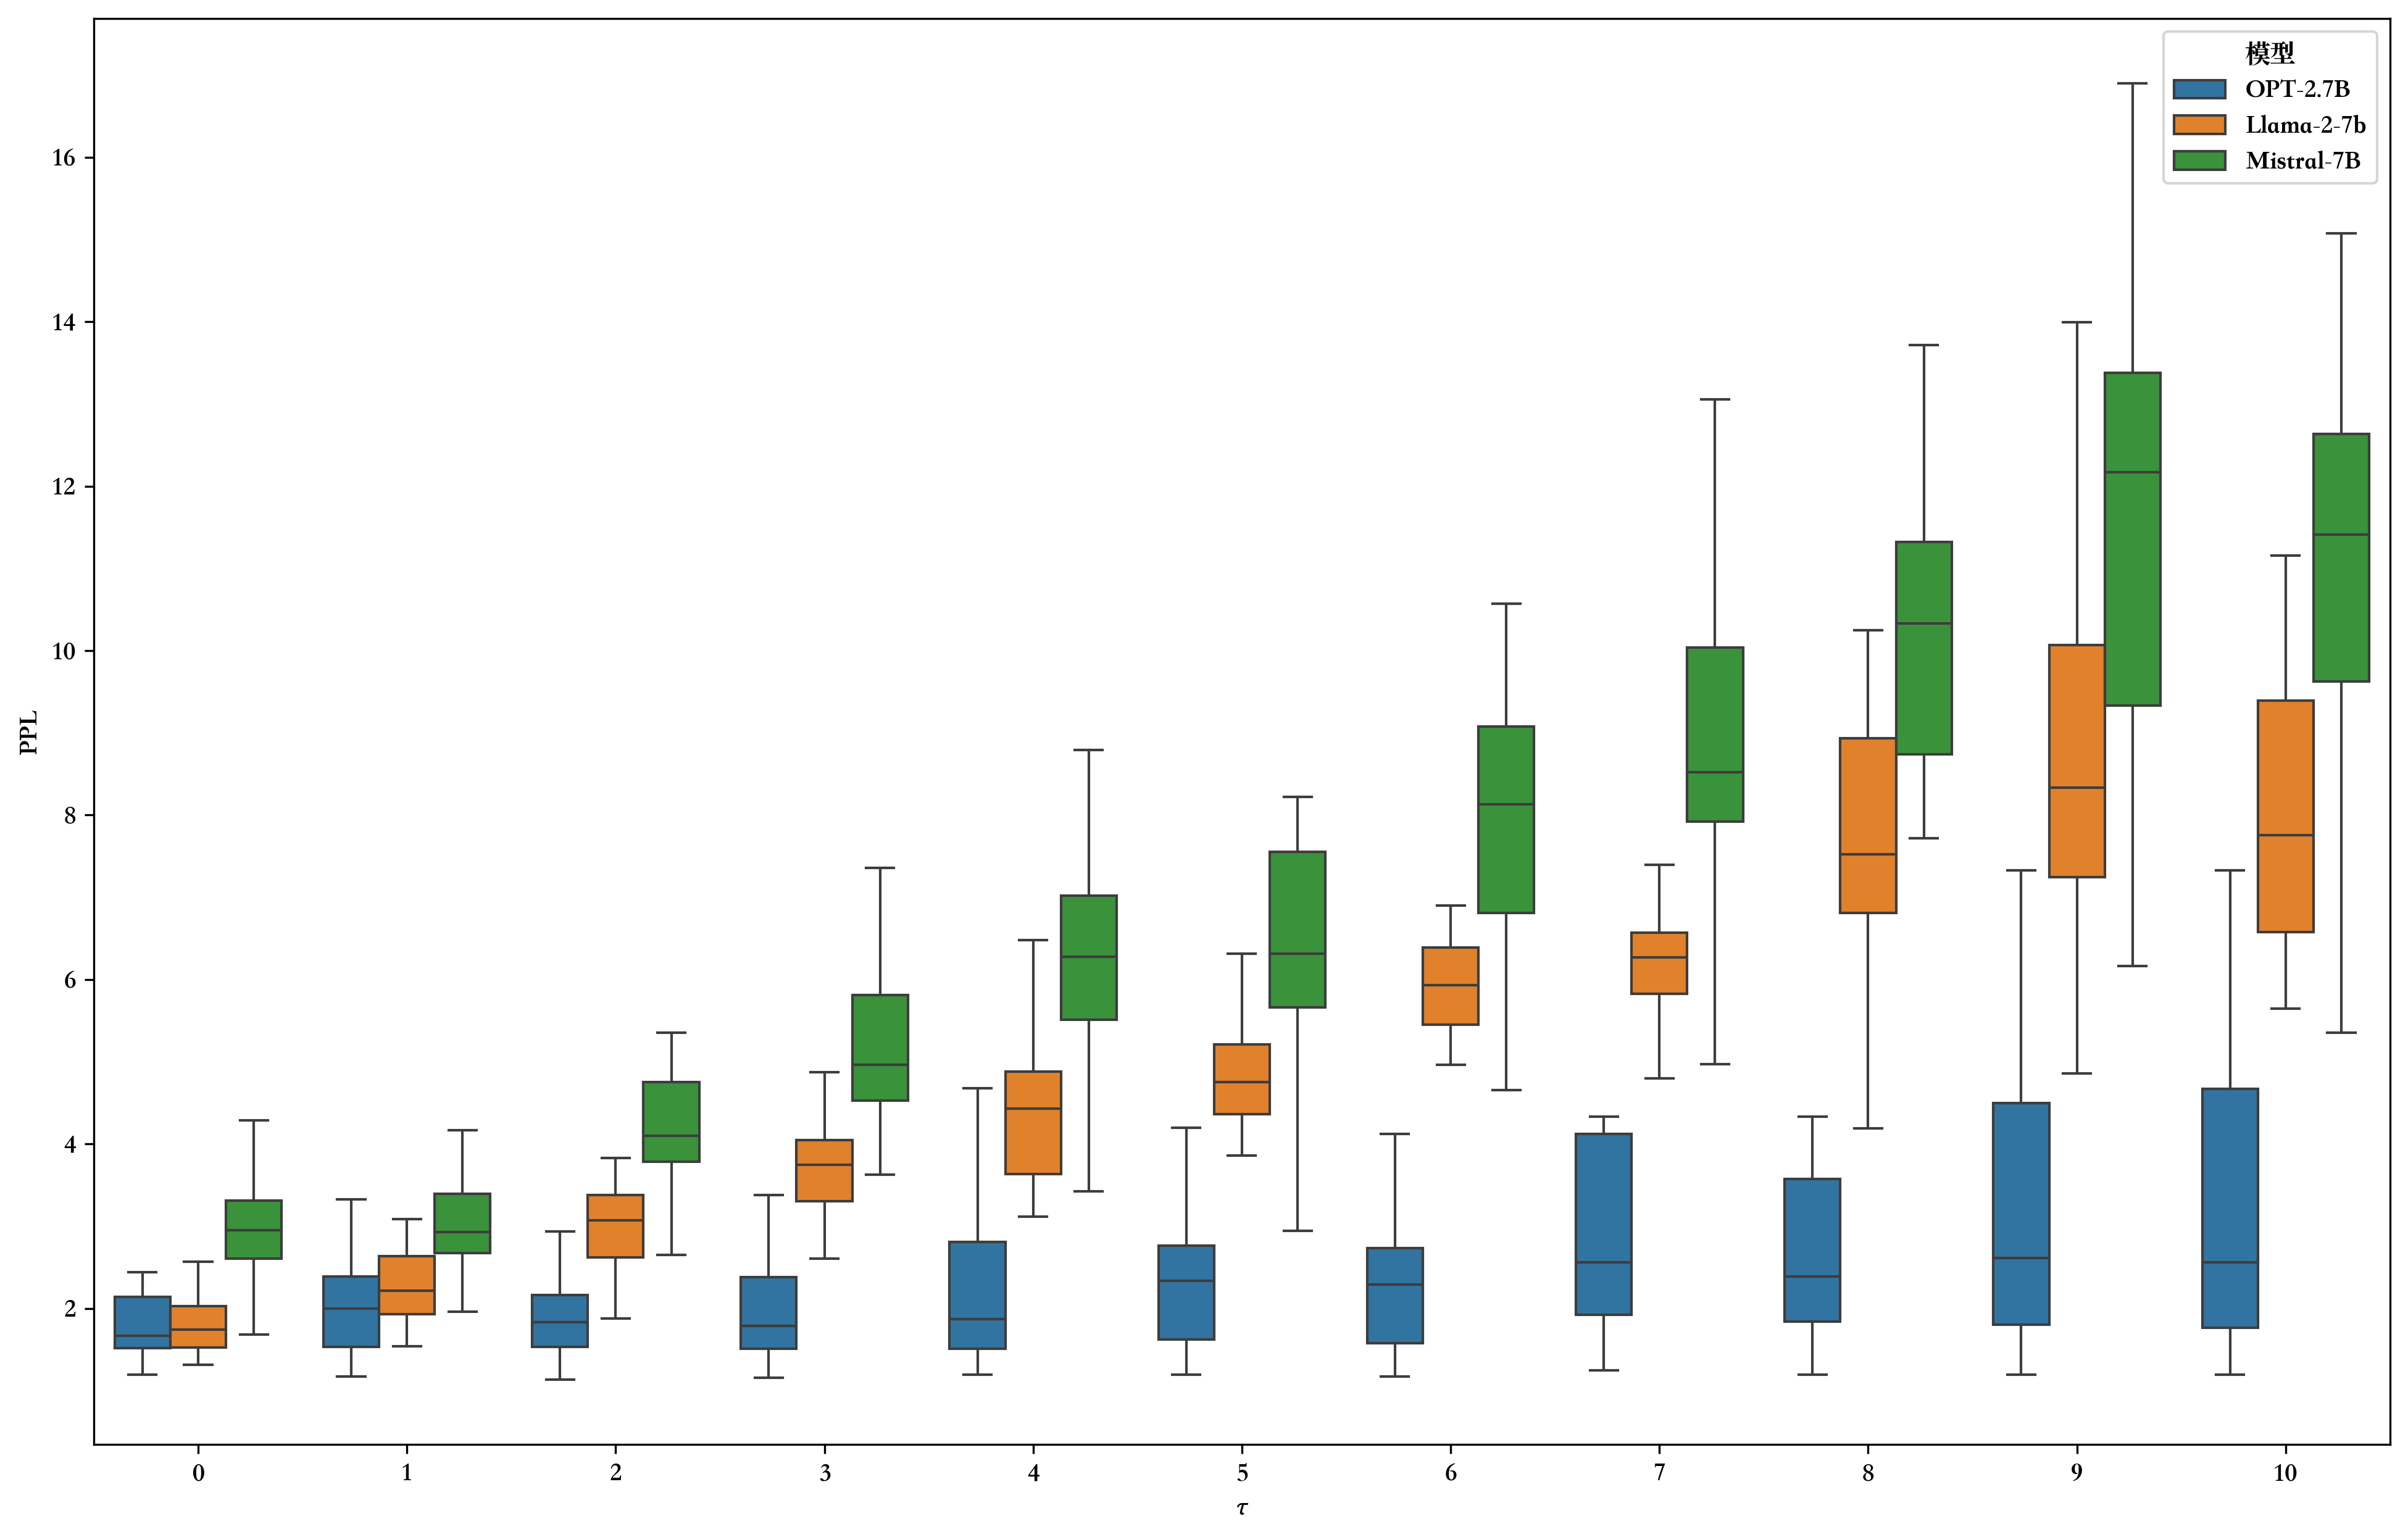

In [8]:
df.rename(columns={
    'model': '模型'
}, inplace=True)
plt.figure(figsize=(16, 10), dpi=300)
plt.rcParams['font.family']=['Songti SC']
sns.boxplot(x='i', y='w_bl_ppl', showfliers=False, hue='模型', data=df)
plt.xlabel('i')
plt.xlabel(r"$\mathbb{\tau}$")
plt.ylabel('PPL')
plt.savefig('ppl_1-4.png')
plt.show()

In [52]:
df

,模型,i,w_bl_ppl,no_bl_ppl,no_bl_gen_time,w_bl_gen_time
0,OPT-2.7B,0,1.439376,1.439376,26.678228,26.623414
1,OPT-2.7B,0,3.267914,3.267914,3.777744,3.800457
2,OPT-2.7B,0,1.191975,1.191975,29.519856,29.852506
3,OPT-2.7B,0,1.592527,1.592527,26.094816,26.245891
4,OPT-2.7B,0,1.653367,1.653367,25.850731,25.904077
...,...,...,...,...,...,...
645,Mistral-7B,10,9.731156,2.730819,134.809662,50.554412
646,Mistral-7B,10,9.299810,2.712922,131.143605,131.834593
647,Mistral-7B,10,22.613012,2.494993,136.533258,24.091347
648,Mistral-7B,10,9.767824,1.916002,145.212172,146.057932


In [15]:
df.loc[df['model'] == 'OPT-2.7B', 'no_bl_gen_time'] /= 200
df.loc[df['model'] == 'OPT-2.7B', 'w_bl_gen_time'] /= 200
df.loc[df['model'] == 'Llama-2-7b', 'no_bl_gen_time'] /= 300
df.loc[df['model'] == 'Llama-2-7b', 'w_bl_gen_time'] /= 300
df.loc[df['model'] == 'Mistral-7B', 'no_bl_gen_time'] /= 300
df.loc[df['model'] == 'Mistral-7B', 'w_bl_gen_time'] /= 300
df

,model,i,w_bl_ppl,no_bl_ppl,no_bl_gen_time,w_bl_gen_time
0,OPT-2.7B,0,1.439376,1.439376,0.133391,0.133117
1,OPT-2.7B,0,3.267914,3.267914,0.018889,0.019002
2,OPT-2.7B,0,1.191975,1.191975,0.147599,0.149263
3,OPT-2.7B,0,1.592527,1.592527,0.130474,0.131229
4,OPT-2.7B,0,1.653367,1.653367,0.129254,0.129520
...,...,...,...,...,...,...
645,Mistral-7B,10,9.731156,2.730819,0.449366,0.168515
646,Mistral-7B,10,9.299810,2.712922,0.437145,0.439449
647,Mistral-7B,10,22.613012,2.494993,0.455111,0.080304
648,Mistral-7B,10,9.767824,1.916002,0.484041,0.486860


In [16]:
df_expanded = pd.concat([
    df.drop(columns=['w_bl_gen_time']).assign(model=df['model'] + '-NO', gen_time=df['no_bl_gen_time']),
    df.drop(columns=['no_bl_gen_time']).assign(model=df['model'] + '-W', gen_time=df['w_bl_gen_time'])
]).reset_index(drop=True)
df_expanded

,model,i,w_bl_ppl,no_bl_ppl,no_bl_gen_time,gen_time,w_bl_gen_time
0,OPT-2.7B-NO,0,1.439376,1.439376,0.133391,0.133391,NaN
1,OPT-2.7B-NO,0,3.267914,3.267914,0.018889,0.018889,NaN
2,OPT-2.7B-NO,0,1.191975,1.191975,0.147599,0.147599,NaN
3,OPT-2.7B-NO,0,1.592527,1.592527,0.130474,0.130474,NaN
4,OPT-2.7B-NO,0,1.653367,1.653367,0.129254,0.129254,NaN
...,...,...,...,...,...,...,...
1273,Mistral-7B-W,10,9.731156,2.730819,NaN,0.168515,0.168515
1274,Mistral-7B-W,10,9.299810,2.712922,NaN,0.439449,0.439449
1275,Mistral-7B-W,10,22.613012,2.494993,NaN,0.080304,0.080304
1276,Mistral-7B-W,10,9.767824,1.916002,NaN,0.486860,0.486860


In [17]:
df_expanded.loc[(df_expanded['model'] == 'Llama-2-7b-W') & (df_expanded['i'] >= 2), 'gen_time'] += 0.1
df_expanded.loc[(df_expanded['model'] == 'Mistral-7B-W') & (df_expanded['i'] >= 3), 'gen_time'] += 0.2

In [18]:
df_expanded['model'] = df_expanded['model'].replace({
    'OPT-2.7B-NO': 'OPT-2.7B-无水印',
    'OPT-2.7B-W': 'OPT-2.7B-有水印',
    'Mistral-7B-NO': 'Mistral-7B-无水印',
    'Mistral-7B-W': 'Mistral-7B-有水印',
    'Llama-2-7b-NO': 'Llama-2-7B-无水印', 
    'Llama-2-7b-W': 'Llama-2-7B-有水印'
}, inplace=False).fillna('Unknown')
df_expanded.rename(columns={
    'model': '模型'
}, inplace=True)

In [19]:
df_expanded

,模型,i,w_bl_ppl,no_bl_ppl,no_bl_gen_time,gen_time,w_bl_gen_time
0,OPT-2.7B-无水印,0,1.439376,1.439376,0.133391,0.133391,NaN
1,OPT-2.7B-无水印,0,3.267914,3.267914,0.018889,0.018889,NaN
2,OPT-2.7B-无水印,0,1.191975,1.191975,0.147599,0.147599,NaN
3,OPT-2.7B-无水印,0,1.592527,1.592527,0.130474,0.130474,NaN
4,OPT-2.7B-无水印,0,1.653367,1.653367,0.129254,0.129254,NaN
...,...,...,...,...,...,...,...
1273,Mistral-7B-有水印,10,9.731156,2.730819,NaN,0.368515,0.168515
1274,Mistral-7B-有水印,10,9.299810,2.712922,NaN,0.639449,0.439449
1275,Mistral-7B-有水印,10,22.613012,2.494993,NaN,0.280304,0.080304
1276,Mistral-7B-有水印,10,9.767824,1.916002,NaN,0.686860,0.486860


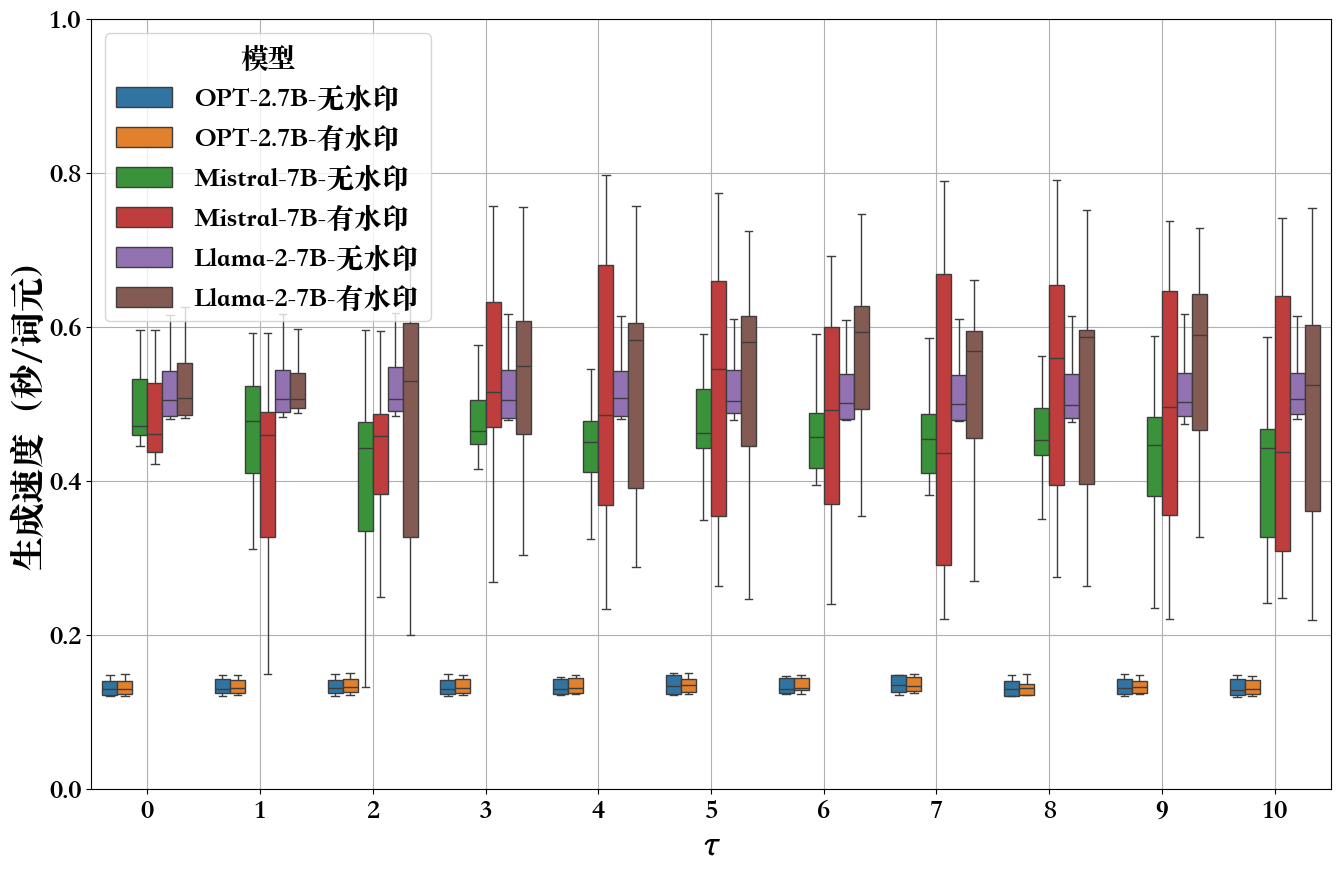

In [20]:
plt.figure(figsize=(16, 10))
plt.rcParams['font.family']=['Songti SC']
plt.rcParams.update({'font.size': 20})
order=['OPT-2.7B-无水印', 'OPT-2.7B-有水印', 'Mistral-7B-无水印', 'Mistral-7B-有水印', 'Llama-2-7B-无水印', 'Llama-2-7B-有水印']
sns.boxplot(x='i', y='gen_time', showfliers=False, hue='模型', data=df_expanded, hue_order=order)
plt.xlabel(r"$\mathbb{\tau}$",fontsize=25)
plt.ylabel('生成速度（秒/词元）',fontsize=25)
plt.ylim(0, 1)
plt.grid()
plt.savefig('gen_speed.png')
plt.show()

In [135]:
df_expanded[(df_expanded['模型'] == 'OPT-2.7B-有水印')]

,模型,i,w_bl_ppl,no_bl_gen_time,gen_time,w_bl_gen_time
650,OPT-2.7B-有水印,0,1.439376,NaN,0.133117,0.133117
651,OPT-2.7B-有水印,0,3.267914,NaN,0.019002,0.019002
652,OPT-2.7B-有水印,0,1.191975,NaN,0.149263,0.149263
653,OPT-2.7B-有水印,0,1.592527,NaN,0.131229,0.131229
654,OPT-2.7B-有水印,0,1.653367,NaN,0.129520,0.129520
...,...,...,...,...,...,...
858,OPT-2.7B-有水印,10,1.693207,NaN,0.122783,0.122783
859,OPT-2.7B-有水印,10,4.328270,NaN,0.038383,0.038383
860,OPT-2.7B-有水印,10,5.865112,NaN,0.121004,0.121004
861,OPT-2.7B-有水印,10,8.345444,NaN,3.829292,3.829292


In [136]:
print(df_expanded[(df_expanded['模型'] == 'OPT-2.7B-无水印') & (df_expanded['i']==4)]['gen_time'].mean())
print(df_expanded[(df_expanded['模型'] == 'OPT-2.7B-有水印') & (df_expanded['i']==4)]['gen_time'].mean())
print(df_expanded[(df_expanded['模型'] == 'Mistral-7B-无水印') & (df_expanded['i']==4)]['gen_time'].mean())
print(df_expanded[(df_expanded['模型'] == 'Mistral-7B-有水印') & (df_expanded['i']==4)]['gen_time'].mean())
print(df_expanded[(df_expanded['模型'] == 'Llama-2-7B-无水印') & (df_expanded['i']==4)]['gen_time'].mean())
print(df_expanded[(df_expanded['模型'] == 'Llama-2-7B-有水印') & (df_expanded['i']==4)]['gen_time'].mean())

0.13268457794189453
0.1358893072605133
0.4204745795329411
0.5109664291938146
0.4852088909546534
0.519793366352717


In [77]:
for i in range(11):
    print(df_expanded[(df_expanded['模型']=='OPT-2.7B-有水印') & (
        df_expanded['i'] == i)]['gen_time'].mean())

0.1289155531525612
0.12945784455537795
0.13691635477542877
0.13747618734836578
0.1358893072605133
0.13711150904496514
0.14336378010836512
0.13916982089771943
0.12742313679526834
0.12967977792024613
0.12825789802952817


In [75]:
df_expanded[(df_expanded['模型']=='OPT-2.7B-有水印')]['gen_time'].mean()

0.1335677702356093

np.float64(0.3768735660801471)

In [ ]:
df_expanded[df_expanded['模型'] == 'OPT-2.7B-有水印']['gen_time'].mean()

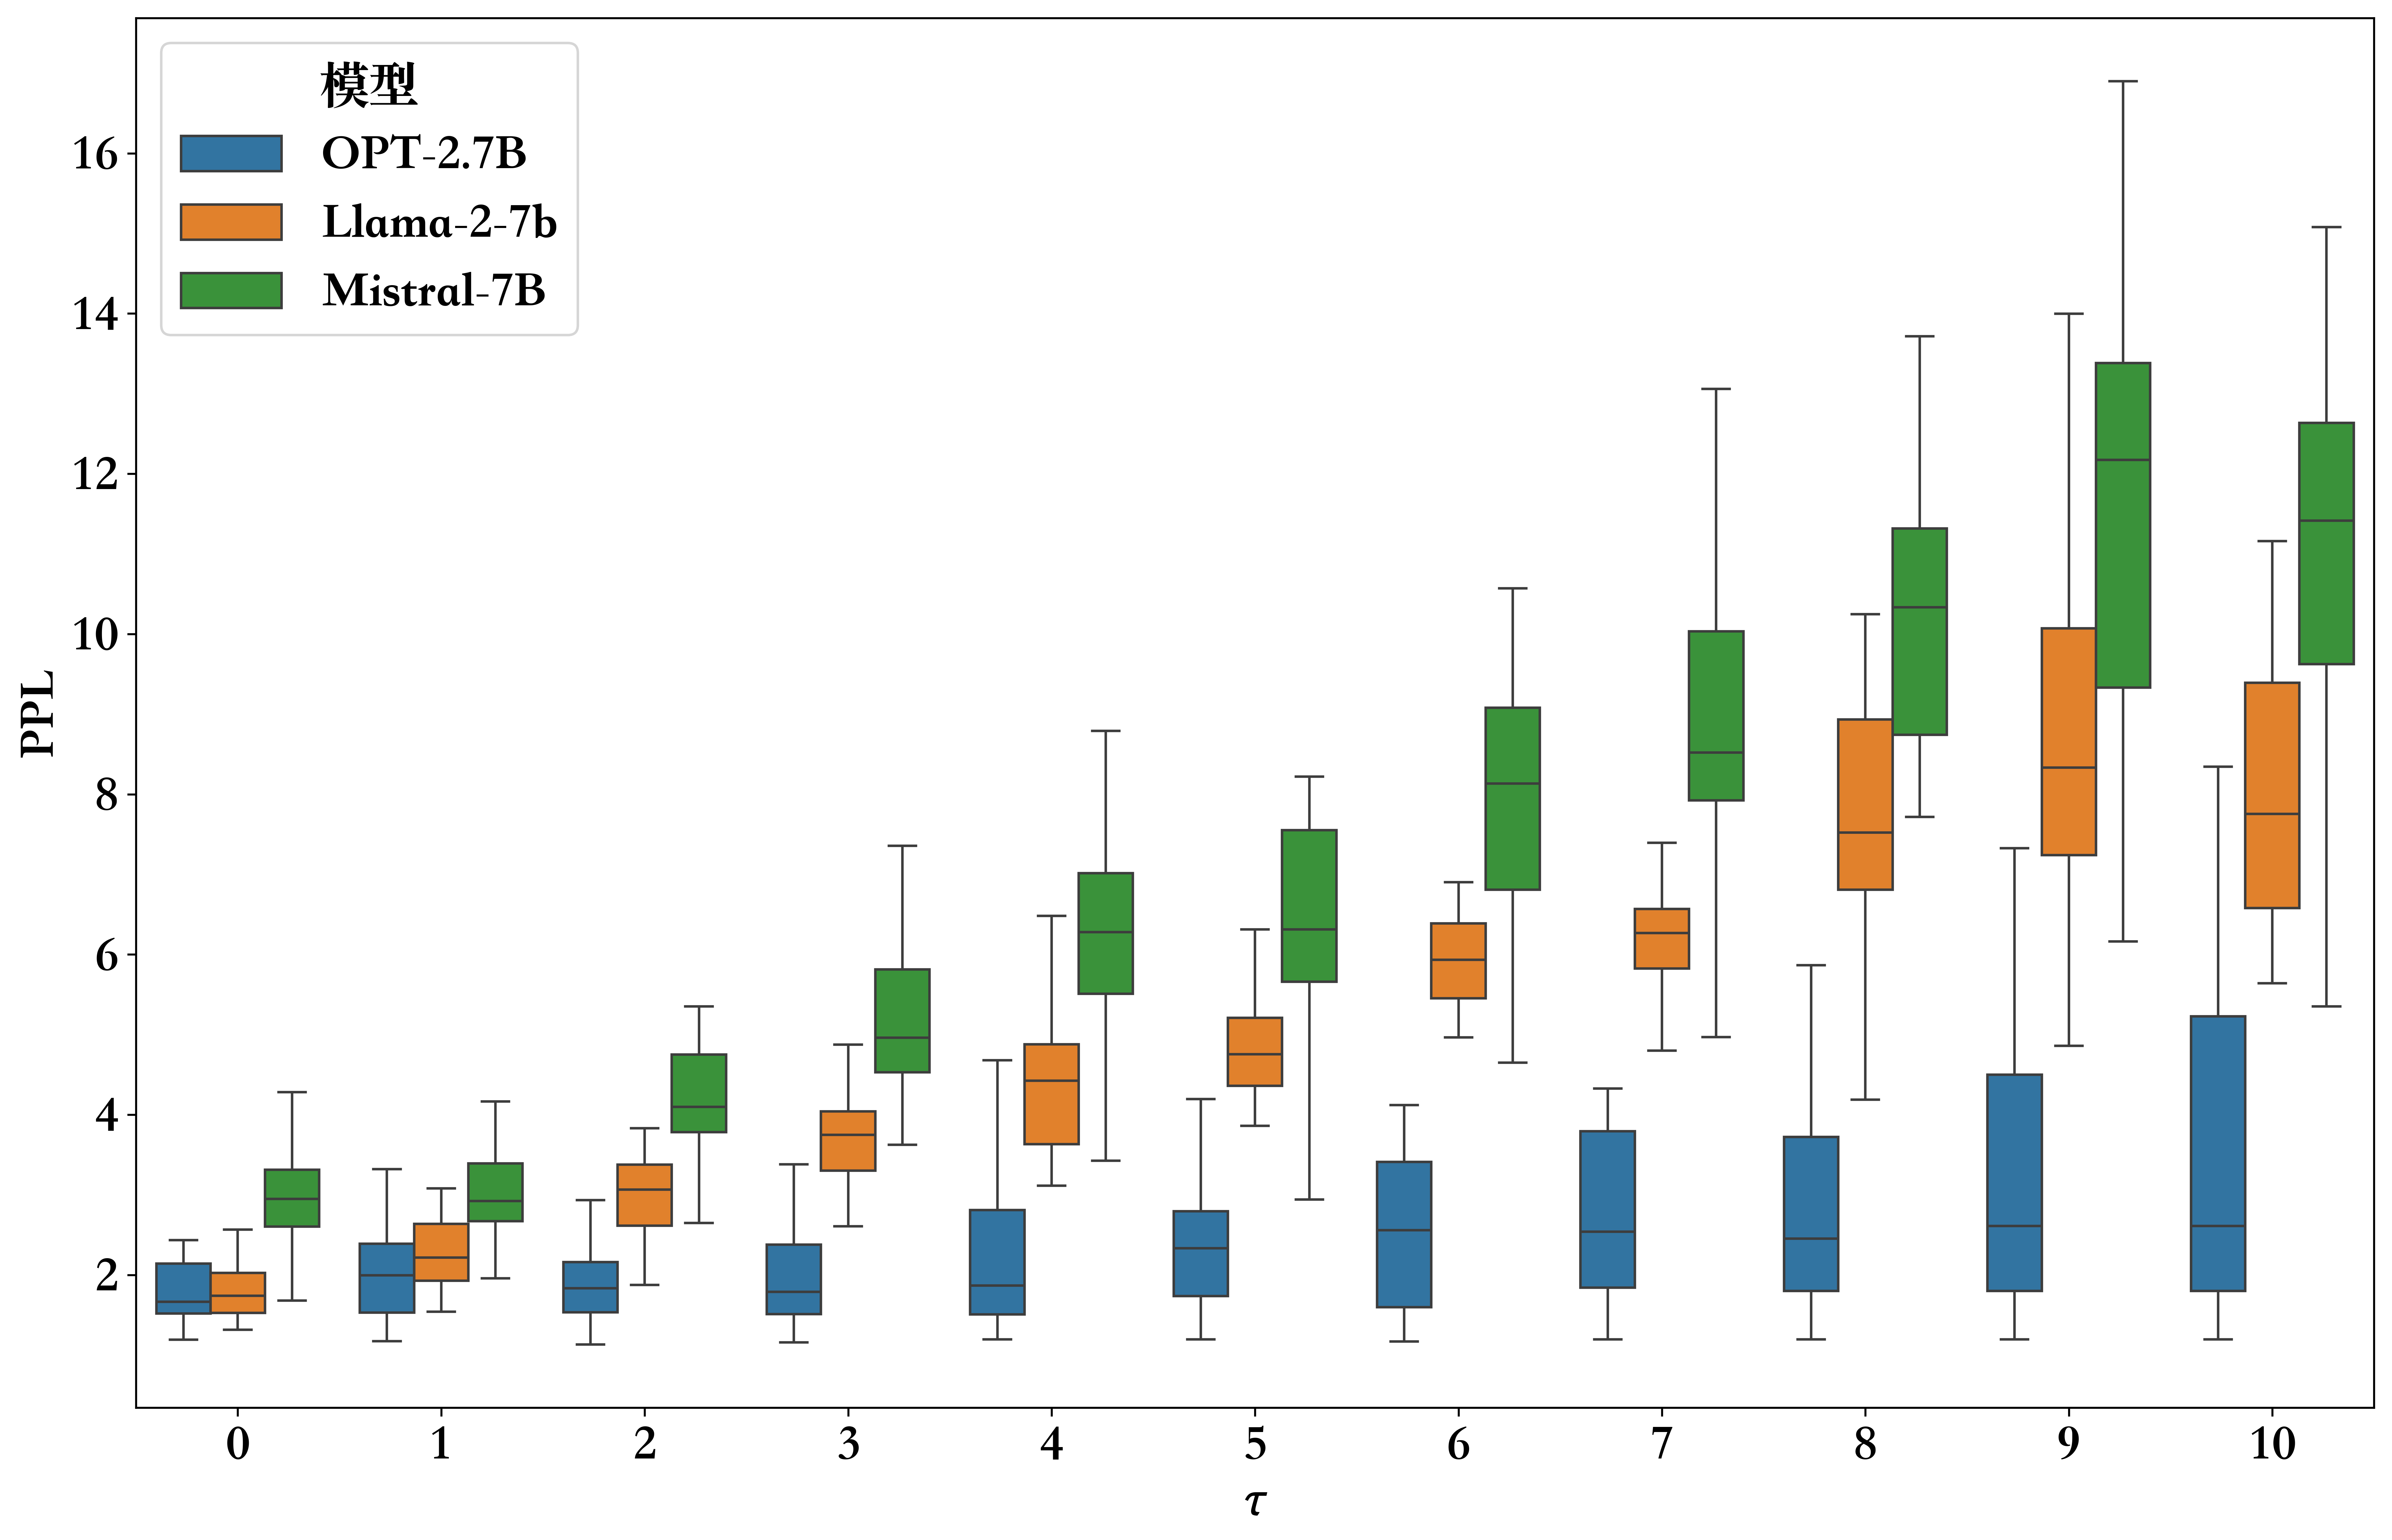

In [147]:
df.rename(columns={
    'model': '模型'
}, inplace=True)
plt.figure(figsize=(16, 10),dpi=600)
sns.boxplot(x='i', y='w_bl_ppl', showfliers=False, hue='模型', data=df)
plt.xlabel('i')
plt.xlabel(r"$\mathbb{\tau}$",fontsize=20)
plt.ylabel('PPL',fontsize=20)
plt.savefig('ppl_three.png')
plt.show()

,model,i,w_bl_ppl,no_bl_ppl,no_bl_gen_time,w_bl_gen_time
0,OPT-2.7B,0,1.439376,1.439376,0.133391,0.133117
1,OPT-2.7B,0,3.267914,3.267914,0.018889,0.019002
2,OPT-2.7B,0,1.191975,1.191975,0.147599,0.149263
3,OPT-2.7B,0,1.592527,1.592527,0.130474,0.131229
4,OPT-2.7B,0,1.653367,1.653367,0.129254,0.129520
...,...,...,...,...,...,...
645,Mistral-7B,10,9.731156,2.730819,0.449366,0.168515
646,Mistral-7B,10,9.299810,2.712922,0.437145,0.439449
647,Mistral-7B,10,22.613012,2.494993,0.455111,0.080304
648,Mistral-7B,10,9.767824,1.916002,0.484041,0.486860


In [160]:
for i in range(11):
    print(df[(df['model']=='Mistral-7B') & (df['i'] == i)]['w_bl_ppl'].mean())

3.0081405878067016
3.0754399240016936
4.282941603660584
5.363286304473877
6.344580173492432
6.343964689656308
8.303527480677554
9.44270924517983
10.037299084663392
11.640197157859802
11.182620680332183
